In [108]:
import matplotlib.pyplot as plt
# import 
# from notebook_utils import plot
# plot.setup()
import matplotlib.gridspec as gridspec


In [4]:
import numpy as np
from utils import data_provider

In [5]:
X_train, Y_train = data_provider.get_mnist('train', dir_path='../data/mnist')
X_test, Y_test = data_provider.get_mnist('test', dir_path='../data/mnist')

2017-12-10 12:44:48,896 | DEBUG : data_provider.py(get_mnist 21) - Load MNIST : train
2017-12-10 12:44:49,779 | DEBUG : data_provider.py(get_mnist 21) - Load MNIST : test


In [6]:
X_test.shape

(10000, 784)

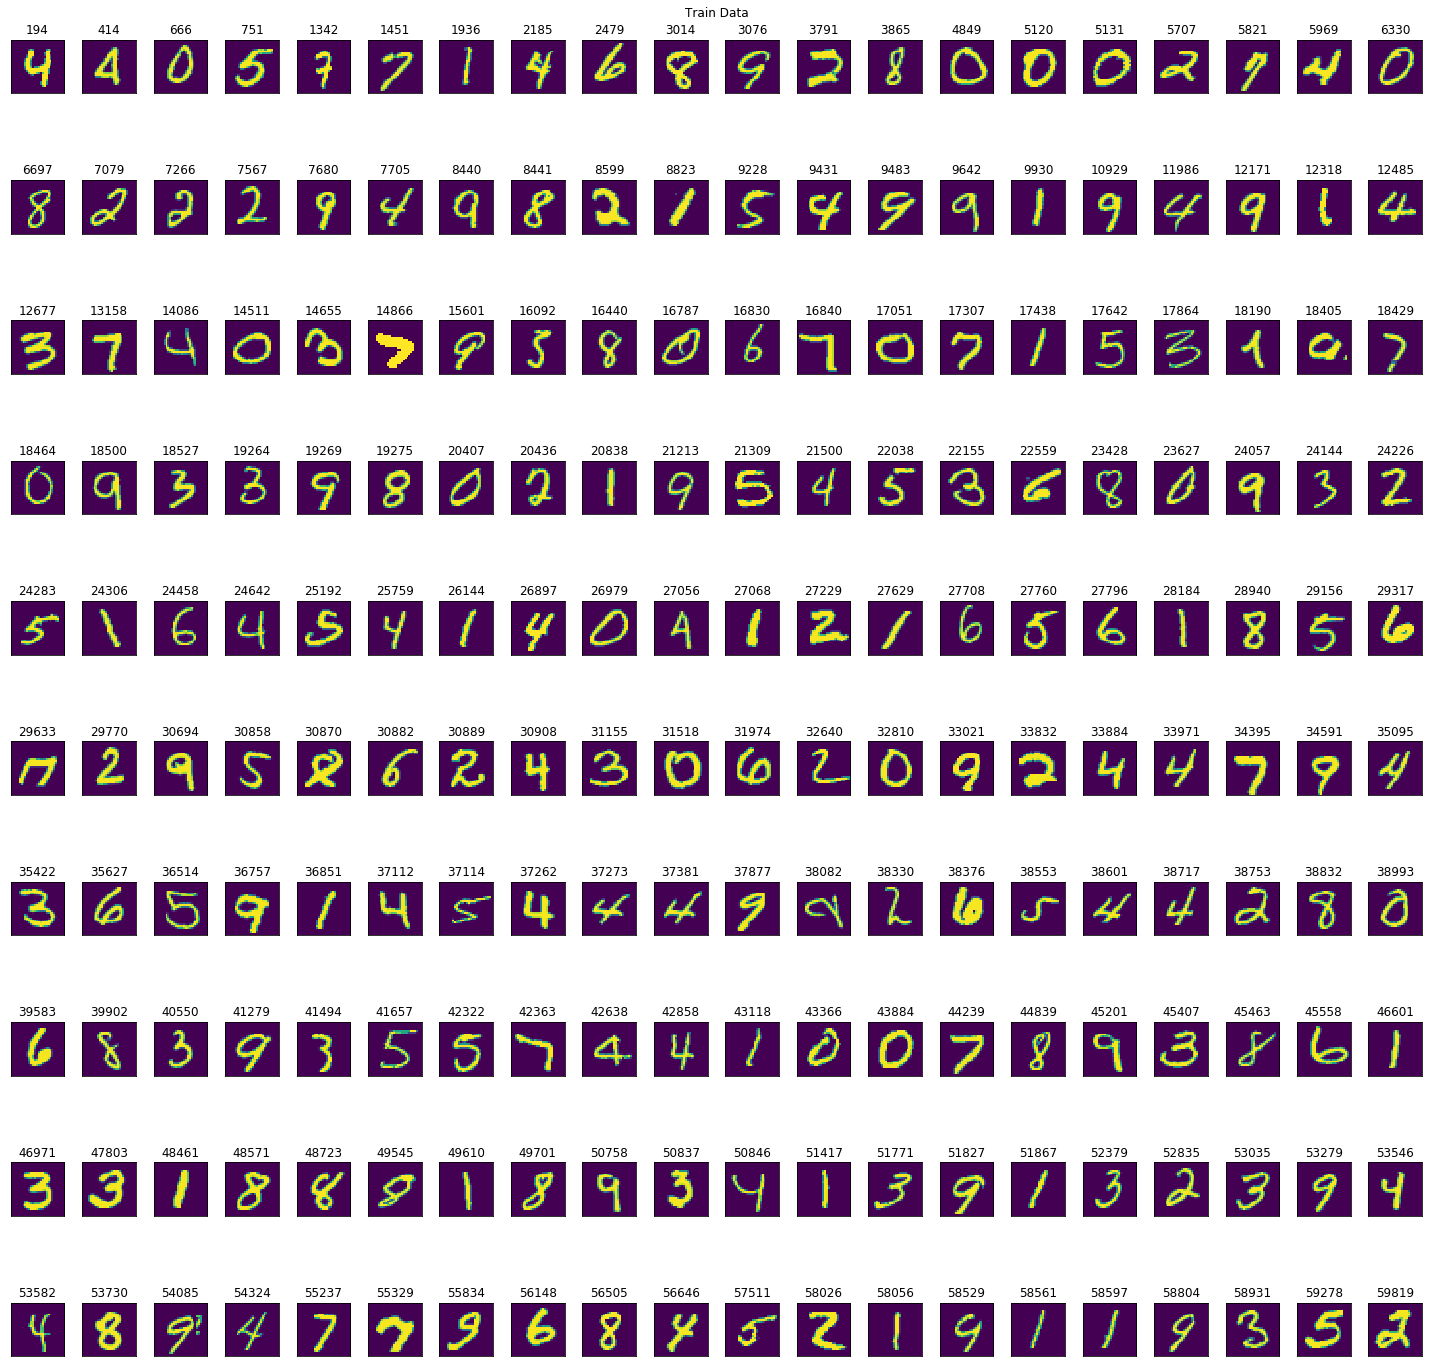

In [53]:
plt.figure(figsize=(20,20))
plt.suptitle('Train Data')
count = 1
for i in sorted(np.random.choice(60000,200, replace=False)):
    plt.subplot(10,20, count)
    plt.imshow(X_train[i,:].reshape(28,28))
    plt.xticks([])
    plt.yticks([])
    plt.title(i)
    count = count + 1
plt.tight_layout()
plt.show()

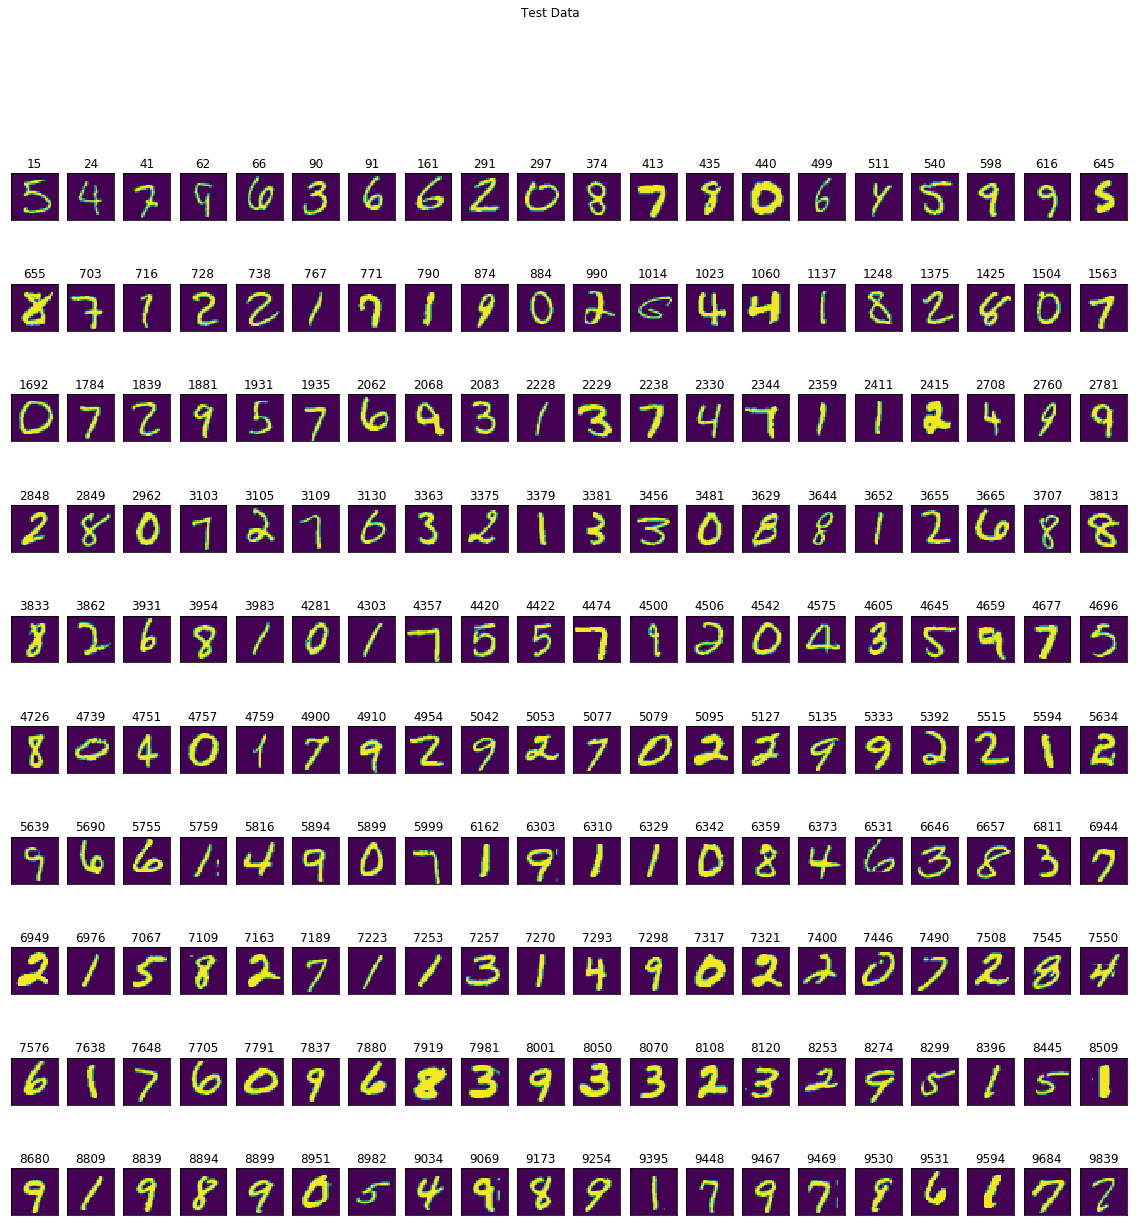

In [55]:
plt.figure(figsize=(20,20))
plt.suptitle('Test Data')
count = 1
for i in sorted(np.random.choice(10000,200, replace=False)):
    plt.subplot(10,20, count)
    plt.imshow(X_test[i,:].reshape(28,28))
    plt.xticks([])
    plt.yticks([])
    plt.title(i)
    count = count + 1
plt.show()

In [96]:
fashionMNIST = data_provider.FashionMNISTData(dir_path='../data/fashion-mnist')

2017-12-13 09:59:19,145 | DEBUG : data_provider.py(get_mnist 22) - Load ../data/fashion-mnist : train
2017-12-13 09:59:19,648 | DEBUG : data_provider.py(get_mnist 22) - Load ../data/fashion-mnist : test


In [64]:
import imp
imp.reload(data_provider)

<module 'utils.data_provider' from '/Users/heytitle/projects/heatmapping-tutorial/src/utils/data_provider.py'>

In [57]:
labels = np.sum(fashionMNIST.test2d.y * np.array(range(0,10)), axis=1)

IndexError: index 3042 is out of bounds for axis 1 with size 1000

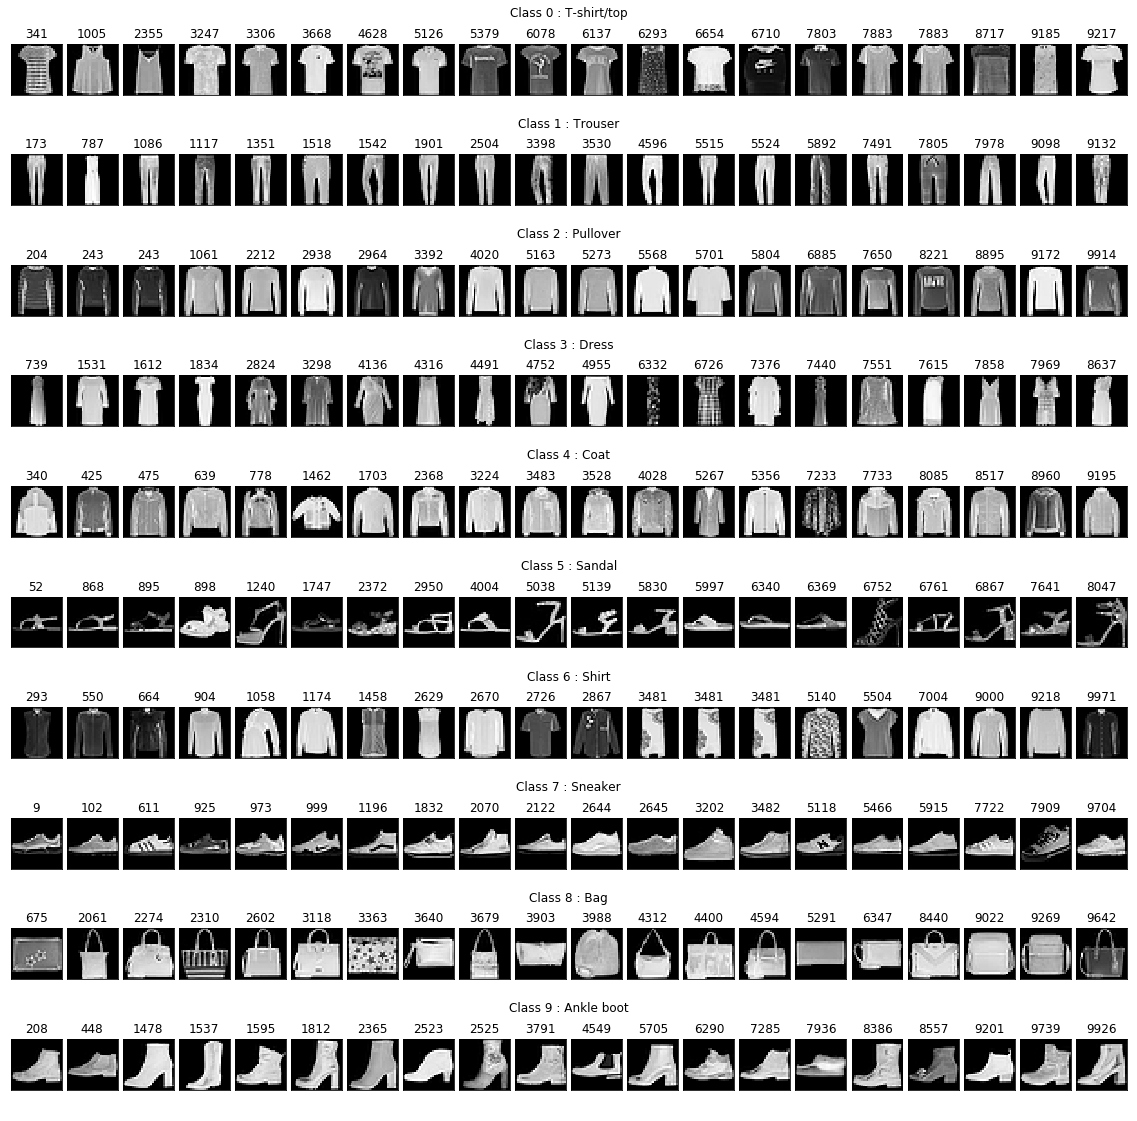

In [125]:

# def plot_fashionmnist(data, indices, title=""):
#     plt.figure(figsize=(20,2))
#     plt.suptitle(title)
#     count = 1
#     for i in sorted(indices):
#         plt.subplot(1,20, count)
#         plt.imshow(data[i,:].reshape(28,28), cmap="gray")
#         plt.xticks([])
#         plt.yticks([])
#         plt.title(i)
#         count = count + 1
#     plt.show()
    
def plot_fashionmnist():
    fig = plt.figure(figsize=(20,2*10))

    outer = gridspec.GridSpec(10, 1)

    for i in range(0,10):
        total =  20
        no_rows = 1
        inner = gridspec.GridSpecFromSubplotSpec(no_rows, total,
                        subplot_spec=outer[i], wspace=0.1, hspace=0.01)

        selected = np.array(range(fashionMNIST.test2d.x.shape[0]))[labels==i]
        sorted_indices = sorted(selected[np.random.choice(selected.shape[0], total*no_rows)])
        
        for j, idx in zip(range(total*no_rows), sorted_indices):
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(fashionMNIST.test2d.x[idx,:].reshape(28,28), cmap="gray")
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(idx)


            fig.add_subplot(ax)

        ax_outer = plt.Subplot(fig, outer[i])

        title = 'Class %d : %s' % (i, fashionMNIST.get_text_label(i))

        ax_outer.set_title(title)

        ax_outer._frameon = False
        ax_outer.xaxis.set_visible(False)
        ax_outer.yaxis.set_visible(False)
        fig.add_subplot(ax_outer)
    plt.show()
plot_fashionmnist()

In [ ]:
import imp
imp.reload(data_provider)

In [18]:
from IPython.core.magic import (register_cell_magic)

In [187]:

@register_cell_magic
def cmagic(line, cell):
    lines = cell.split('\n')
    print(cell)
    exec('global plot_title \n %s' % cell)

    plot_name = '%s.png' % plot_title.get_text().lower().replace(' ', '-')
    print('Saving figure to %s' % plot_name)
    exec('plt.savefig("%s")' % plot_name)

In [199]:
a = [1,2,3]

In [200]:
plot_title.get_text()

'sdf 5'

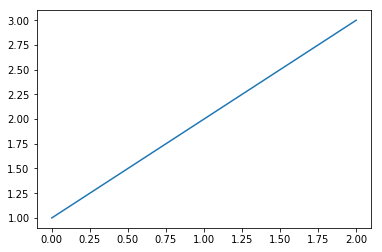

In [202]:
sdf = plt.plot(a)

In [203]:
sdf.savefig('sdf.png')

AttributeError: 'list' object has no attribute 'savefig'

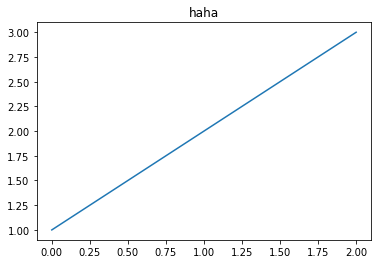

In [168]:
my_cmd  = '''
plt.plot(a)
plt.title("haha")
'''

exec(my_cmd)
plt.get('title')

In [157]:
'asd ASDF'.lower().replace(' ', '-')

'asd-asdf'

In [120]:
import IPython

In [74]:
from IPython.core.display import Javascript
from IPython.display import display


def get_notebook_name():
    """Returns the name of the current notebook as a string
    
    From From https://mail.scipy.org/pipermail/ipython-dev/2014-June/014096.html
    """
    display(Javascript('IPython.notebook.kernel.execute("theNotebook5 = " + \
    "\'"+IPython.notebook.notebook_name+"\'");'))
    return theNotebook5

In [75]:
get_notebook_name()
get_notebook_name()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'test-plot-utils.ipynb'

In [71]:
theNotebook2

'test-plot-utils.ipynb'

In [79]:
Javascript('IPython.notebook.kernel.execute("theNotebook6 = " + "\'"+IPython.notebook.notebook_name+"\'");')

<IPython.core.display.Javascript object>

In [80]:
theNotebook6

'test-plot-utils.ipynb'

In [2]:
import numpy as np

In [41]:
v1 = np.power(0.5,2)
x = np.arange(-1,1,0.01)
p = np.exp( -np.power(x-0.6,2)/v1 )
q = np.exp( -np.power(x+1,2)/v1 )

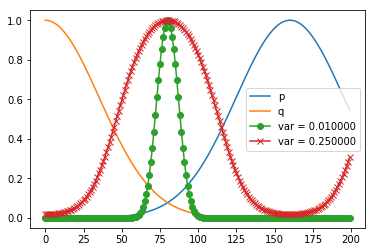

In [49]:
plt.plot(p, label='p')
plt.plot(q, label='q')

diff = np.power(p-q,2)
ss = np.power( [0.1,0.5], 2)
symbols = ['o', 'x']
for i in range(len(ss)):
    s = ss[i]
    symbol = symbols[i]
    plt.plot( np.exp(-diff/s), label = 'var = %f' % s, marker=symbol)

plt.legend()
plt.show()

In [1]:
from utils import experiment_artifact

In [22]:
import imp
imp.reload(experiment_artifact)

<module 'utils.experiment_artifact' from '/Users/heytitle/projects/heatmapping-tutorial/src/utils/experiment_artifact.py'>

In [23]:
experiment_artifact.get_results('../experiment-results/sprint-2')

{'column_at_a_time': 4, 'layer_hidden': 60, 'layer_recur': 7, 'layer_out2': 10, 'layer_out1': 30, 'epoch': 10, 'version': 'sprint2', 'accuracy': 0.9584000110626221, 'layer_in1': 100, 'experiment_name': 'rnn-2017-10-10--22-29', 'seq_length': 7}
{'column_at_a_time': 4, 'layer_hidden': 60, 'layer_recur': 7, 'layer_out2': 10, 'layer_out1': 30, 'epoch': 50, 'version': 'sprint2', 'accuracy': 0.9707000255584717, 'layer_in1': 100, 'experiment_name': 'rnn-2017-10-10--22-31', 'seq_length': 7}
[{'column_at_a_time': 4, 'layer_hidden': 60, 'layer_recur': 7, 'layer_out2': 10, 'layer_out1': 30, 'epoch': 10, 'version': 'sprint2', 'accuracy': 0.9584000110626221, 'layer_in1': 100, 'experiment_name': 'rnn-2017-10-10--22-29', 'seq_length': 7}, {'column_at_a_time': 4, 'layer_hidden': 60, 'layer_recur': 7, 'layer_out2': 10, 'layer_out1': 30, 'epoch': 50, 'version': 'sprint2', 'accuracy': 0.9707000255584717, 'layer_in1': 100, 'experiment_name': 'rnn-2017-10-10--22-31', 'seq_length': 7}]


,accuracy,column_at_a_time,epoch,experiment_name,layer_hidden,layer_in1,layer_out1,layer_out2,layer_recur,seq_length,version
0,0.9584,4,10,rnn-2017-10-10--22-29,60,100,30,10,7,7,sprint2
1,0.9707,4,50,rnn-2017-10-10--22-31,60,100,30,10,7,7,sprint2
